Import potrebnih knjižnic za analizo podatkov:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

Prebiranje datotek s podakti, tukaj se ignorira vrstice, ki pokvarijo strukturo podatkov oziroma v originalni datoteki niso del podatkov temvec prazna vrstica ipd. 
V programski kodi so seveda zamaknjene za -1.

Izberemo tudi samo stolpce z izbranimi točkami:  
A - datumi  
B - povprecje  
C:IW - izbrane tocke  


od IW naprej so pa stolpci prazni in nekje v koncu dokumenta spet nekatere vrednosti, ki niso pomembne

Stolpec z datumi se spremeni v datume.

preberemo se za pretok, po stoplcih:  
A - datum  
B - pretok  
C - prazen  
D - temp. vode  
E - mot. vode  

se preimenujem pretok da bo lazje obdelovati

zdrzuimo oba dataframa s concat (axis = 1 pomeni da po stolpcih)


In [5]:
file_path = 'podatki/Rizana_Zaledje_INCA_dnev_2020_2021_N1.xlsx'
df_padavine = pd.read_excel(file_path, sheet_name='Izbrane', skiprows=[0, 1, 3, 4], usecols="A,C:IW")

df_padavine["datum"] = pd.to_datetime(df_padavine["datum"], format="%m/%d/%y")
df_padavine = df_padavine.set_index('datum')

file_path1 = 'podatki/Pretok_2020_2021_N1.xlsx'
df_pretok = pd.read_excel(file_path1, sheet_name='meritve', usecols="A, B")
df_pretok.rename(columns={"pretok (m3/s)": "pretok"}, inplace=True)

df_pretok["datum"] = pd.to_datetime(df_pretok["datum"], format="%d.%m.%Y")
df_pretok = df_pretok.set_index('datum')

df = pd.concat([df_pretok, df_padavine], axis=1)


### Normalne vrednosti in % odstopanja
- pogledati je treba katere so normalne vrednosti in kakšen procent predstavlja znatno odstopanje

Velikost: (731, 256)
Toliko vrstic vsebuje Nan: 0
Povprečni pretok: 2.757
Mediana pretok: 0.909
Najbolj pogost pretok: 0.193


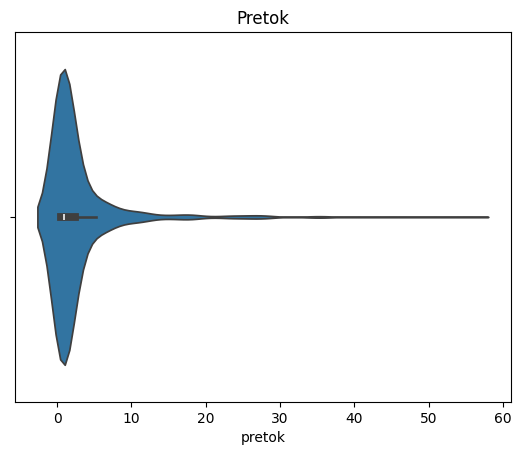

In [6]:
print(f"Velikost: {df.shape}")
#print(f"Stolpci: {df.columns.tolist()}")
"""
x = 5
print(df_pretok.head(x))
print(df_padavine.head(x))
print(df.sample(x))
"""
print(f"Toliko vrstic vsebuje Nan: {df.isna().any(axis=1).sum()}")

#zaokroženo na 3 mesta kot podatki
avgPretok = df['pretok'].mean().round(3) 
modPretok = df["pretok"].mode().iloc[0] 
#mode vrne vecje stevilo zato treba z iloc preveriti prvega ne glede na index
medPretok = df["pretok"].median().round(3)

print(f"Povprečni pretok: {avgPretok}")
print(f"Mediana pretok: {medPretok}")
print(f"Najbolj pogost pretok: {modPretok}")

sns.violinplot(x=df['pretok']) #za data distribution
plt.title("Pretok")
plt.show()

### Isolation forest anomaly detection


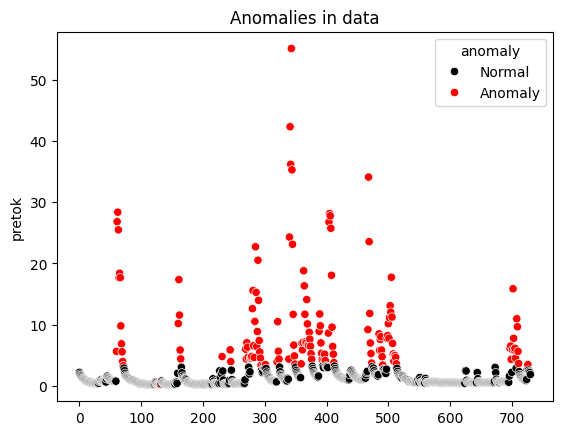

,pretok,68,69,95,96,97,98,122,123,124,...,570,571,572,573,574,575,596,601,anomaly,score
datum,,,,,,,,,,,,,,,,,,,,,
2020-07-10,0.232000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal,-0.435403
2021-08-22,0.487806,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal,-0.381358
2021-06-26,0.549421,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal,-0.382036
2021-10-24,0.526088,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal,-0.376202
2021-08-06,0.544356,18.51,14.10,14.50,13.43,8.33,12.11,9.10,10.59,8.47,...,7.59,9.46,12.95,11.25,11.81,14.65,7.61,10.72,Normal,-0.378415
2021-05-15,10.144889,10.43,11.51,9.62,9.17,7.55,10.56,13.85,12.10,11.15,...,1.10,3.52,2.76,4.99,4.19,5.80,0.17,3.36,Anomaly,-0.599522
2021-05-25,4.913963,26.74,24.08,25.98,25.83,24.86,24.46,27.64,26.38,26.76,...,23.25,23.93,23.19,23.17,23.28,23.94,26.28,24.51,Anomaly,-0.547139
2021-11-03,0.736278,1.64,0.74,1.53,1.86,1.67,2.26,1.26,1.75,1.46,...,0.28,0.56,0.96,0.84,0.81,1.30,0.22,0.44,Normal,-0.399463
2020-02-23,0.740000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal,-0.399916


In [ ]:
model = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', max_features=1.0, random_state=42, bootstrap=False)

stolpec = "pretok"

model.fit(df[[stolpec]])
df['anomaly'] = model.predict(df[[stolpec]])
#df['score'] = model.score_samples(df[[stolpec]])
df['anomaly'] = df['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

sns.scatterplot(x=range(len(df)), y=stolpec, hue='anomaly', data=df, palette=['black', 'red'])
plt.title('Anomalies in data')
plt.show()

df.sample(10)
